In [1]:
import cv2
import pytesseract
import matplotlib as plt
import numpy
import matplotlib.pyplot as plt
from collections import Counter



(1346, 668, 3)
(1346, 668)


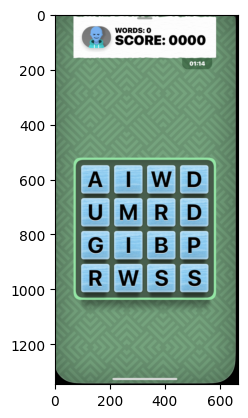

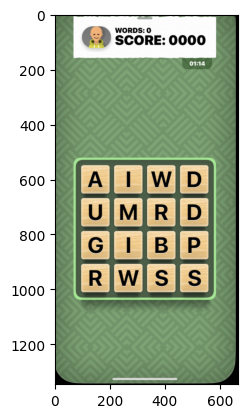

In [2]:

board = "/Users/carter/Downloads/board7.png"
image = cv2.imread(board)
print(image.shape)
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(grayImage.shape)
plt.imshow(image)
plt.show()

rgbImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImage)
plt.show()

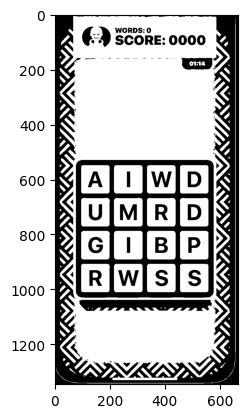

In [3]:
ret, bnwImage = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
plt.imshow(bnwImage, cmap='gray')
plt.show()

In [4]:
contours, hierarchy = cv2.findContours(bnwImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)


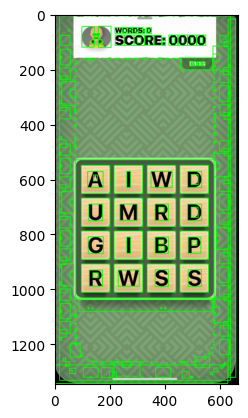

In [5]:
import cv2
debug_image = image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(debug_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
plt.show()


In [6]:
tile_boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if 90 <= w <= 120 and 90 <= h <= 120:
        tile_boxes.append((x, y, w, h))
tile_boxes = sorted(tile_boxes, key=lambda b: (round(b[1]/100), b[0]))


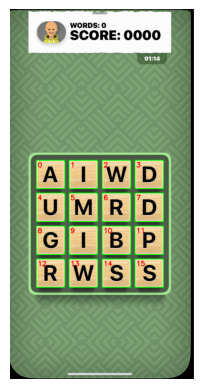

In [7]:
debug_image = image.copy()
for idx, (x, y, w, h) in enumerate(tile_boxes):
    cv2.rectangle(debug_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(debug_image, str(idx), (x + 5, y + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(debug_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()